In [23]:
import numpy as np

from ase import Atoms
from ase.io.trajectory import Trajectory
from ase.calculators.emt import EMT

a = 4.0  # approximate lattice constant
b = a / 2
ag = Atoms('Ag',
           cell=[(0, b, b), (b, 0, b), (b, b, 0)],
           pbc=1,
           calculator=EMT())  # use EMT potential
cell = ag.get_cell()
traj = Trajectory('Ag.traj', 'w')
for x in np.linspace(0.95, 1.05,5,7):
    ag.set_cell(cell * x, scale_atoms=True)
    ag.get_potential_energy()
    traj.write(ag)

100.14189241976 GPa


<AxesSubplot:title={'center':'sj: E: -0.000 eV, V: 16.781 Å$^3$, B: 100.142 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

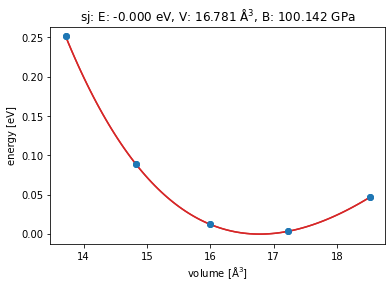

In [24]:
from ase.io import read
from ase.units import kJ
from ase.eos import EquationOfState
configs = read('Ag.traj@0:5')  # read 5 configurations
# Extract volumes and energies:
volumes = [ag.get_volume() for ag in configs]
energies = [ag.get_potential_energy() for ag in configs]
eos = EquationOfState(volumes, energies)
v0, e0, B = eos.fit()
print(B / kJ * 1.0e24, 'GPa')
eos.plot('Ag-eos.pdf')
eos.plot('Ag-eos.png')